In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv("drug200.csv")
raw_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
raw_data['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [5]:
raw_data['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [6]:
raw_data['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [7]:
a = raw_data[raw_data['Drug'] == 'drugA']
b = raw_data[raw_data['Drug'] == 'drugB']
c = raw_data[raw_data['Drug'] == 'drugC']
x = raw_data[raw_data['Drug'] == 'drugX']
y = raw_data[raw_data['Drug'] == 'DrugY']


In [8]:
y

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
4,61,F,LOW,HIGH,18.043,DrugY
6,49,F,NORMAL,HIGH,16.275,DrugY
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY
...,...,...,...,...,...,...
188,65,M,HIGH,NORMAL,34.997,DrugY
189,64,M,HIGH,NORMAL,20.932,DrugY
190,58,M,HIGH,HIGH,18.991,DrugY
192,72,M,LOW,HIGH,16.310,DrugY


C:\Users\nukle\AppData\Local\Temp\ipykernel_8036\2786230760.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(a['Age'],a['Na_to_K'],'o',marker = "o",color = 'red')
C:\Users\nukle\AppData\Local\Temp\ipykernel_8036\2786230760.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(b['Age'],b['Na_to_K'],'o',marker = "o",color = 'green')
C:\Users\nukle\AppData\Local\Temp\ipykernel_8036\2786230760.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(c['Age'],c['Na_to_K'],'o',marker = "o",color = 'blue')
C:\Users\nukle\AppData\Local\Temp\ipykernel_8036\2786230760.py:5: UserWarning: marker is redundantly defined by the 'marker' ke

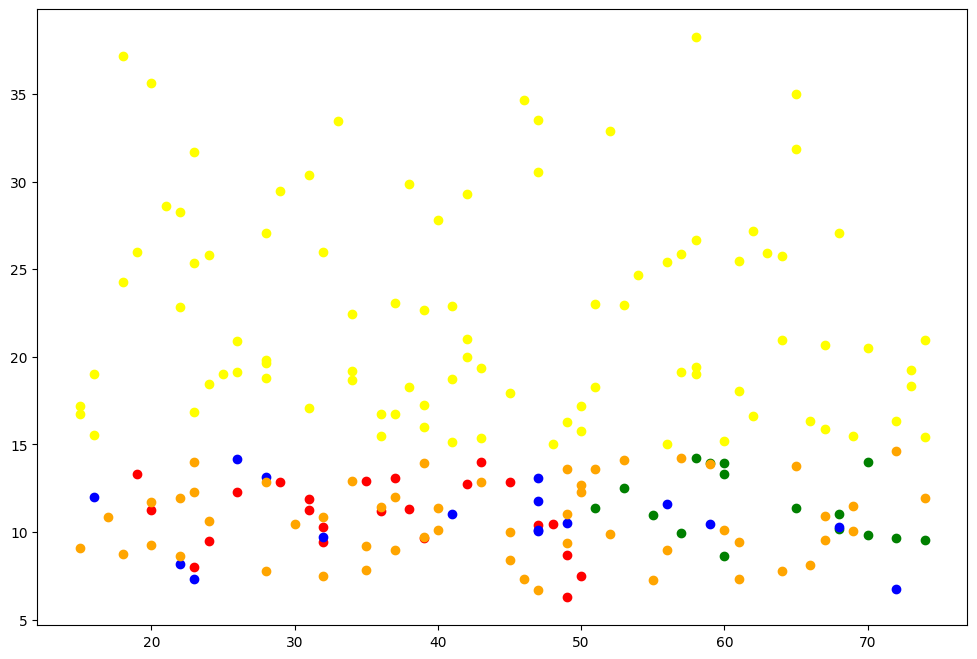

In [9]:
plt.figure(figsize=(12,8))
plt.plot(a['Age'],a['Na_to_K'],'o',marker = "o",color = 'red')
plt.plot(b['Age'],b['Na_to_K'],'o',marker = "o",color = 'green')
plt.plot(c['Age'],c['Na_to_K'],'o',marker = "o",color = 'blue')
plt.plot(x['Age'],x['Na_to_K'],'o',marker = "o",color = 'orange')
plt.plot(y['Age'],y['Na_to_K'],'o',marker = "o",color = 'yellow')

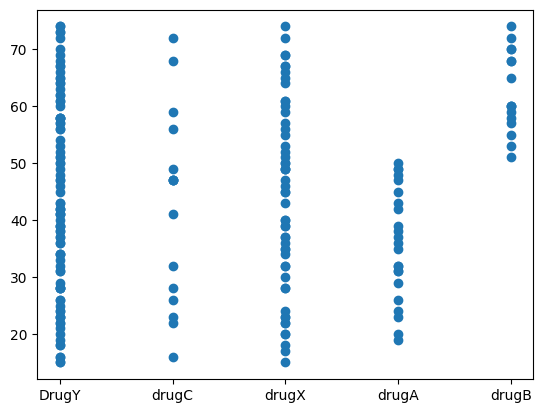

In [60]:
plt.plot(raw_data['Drug'],raw_data['Age'],'o')

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
non_numeric_data = raw_data.drop(['Age','Na_to_K','Drug'],axis=1)

In [11]:
encoded = encoder.fit_transform(non_numeric_data)
encoded = encoded.toarray()

In [12]:
columns = encoder.get_feature_names_out()
final_columns = [name.split('_')[1] for name in columns]
final_columns

['F', 'M', 'HIGH', 'LOW', 'NORMAL', 'HIGH', 'NORMAL']

In [13]:
encoded = pd.DataFrame(encoded,columns = final_columns)
encoded

,F,M,HIGH,LOW,NORMAL,HIGH,NORMAL
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [14]:
numeric_data = raw_data[['Age','Na_to_K']]
numeric_data.head(3)

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114


In [15]:
final_input = pd.concat([numeric_data,encoded],axis=1)

In [16]:
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()
data_oe = oe.fit_transform(raw_data[['Drug']])

e:\ML & Data\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
final_target = data_oe

In [18]:
from sklearn.linear_model import RidgeClassifierCV,RidgeClassifier
from sklearn.svm import SVC

In [19]:
model_ridge = RidgeClassifierCV(alphas=[0.01,1],cv=3)
model_ridge.fit(final_input,final_target)

RidgeClassifierCV(alphas=[0.01, 1], cv=3)

In [20]:
model_ridge.alpha_

0.01

In [21]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(final_input,final_target,test_size=0.3)

In [55]:
model_ridge = RidgeClassifier(alpha=0.01)
model_ridge.fit(X_train,y_train)

RidgeClassifier(alpha=0.01)

In [56]:
model_ridge.score(X_test,y_test)

0.8333333333333334

In [57]:
model_ridge.score(X_train,y_train)

0.9571428571428572